In [1]:
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def line(x,m,b):
    return m*x+b

Text(0, 0.5, 'Followers')

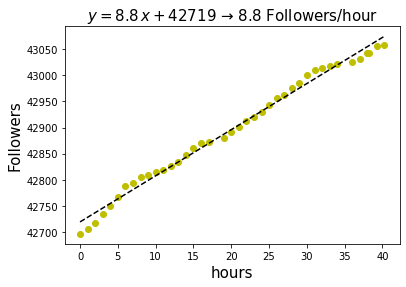

In [37]:
df=pd.read_json('followers.json')

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
plt.plot(df['hours'],df['followers'],'yo')

#Fit:
l,le=optimize.curve_fit(line,df['hours'],df['followers'],p0=[8,40000])
m,b=l
plt.plot(df['hours'],line(df['hours'],m,b),linestyle='--',color='k')
plt.title('$y=%s\\,x+%s$ → %s Followers/hour' %(round(m,1),int(b),round(m,1)),fontsize=15)
plt.xlabel('hours',size=15)
plt.ylabel('Followers',size=15)

Prediction

$y=mx+b$ → $x=(y-b)/m$

In [38]:
def hours(y,m,b):
    return (y-b)/m

In [39]:
days=hours(50000,m,b)/24
days

34.30751538671195

In [42]:
t=df.loc[0,'date_time']

In [41]:
print(f'2021-09-0{int(round(days,0))-(31-t.day)}')

2021-09-07


34.0